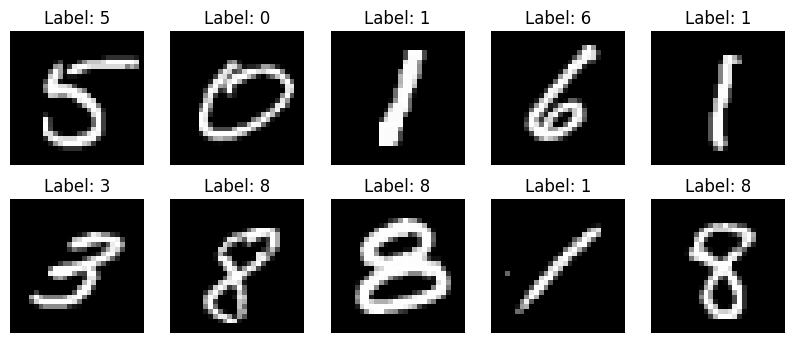

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8472 - loss: 0.4785 - val_accuracy: 0.9803 - val_loss: 0.0628
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9732 - loss: 0.0916 - val_accuracy: 0.9883 - val_loss: 0.0434
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9809 - loss: 0.0640 - val_accuracy: 0.9879 - val_loss: 0.0409
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9854 - loss: 0.0489 - val_accuracy: 0.9893 - val_loss: 0.0368
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9873 - loss: 0.0402 - val_accuracy: 0.9903 - val_loss: 0.0348
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9896 - loss: 0.0327 - val_accuracy: 0.9902 - val_loss: 0.0315
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9916 - loss: 0.0301 - val_accuracy: 0.9910 - val_loss: 0.0313
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9919 -

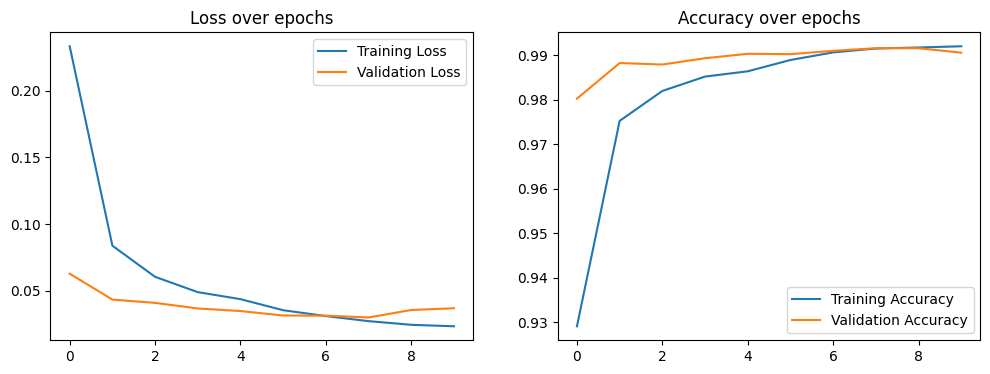

Test Accuracy: 99.03%
Test Loss: 0.0342
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


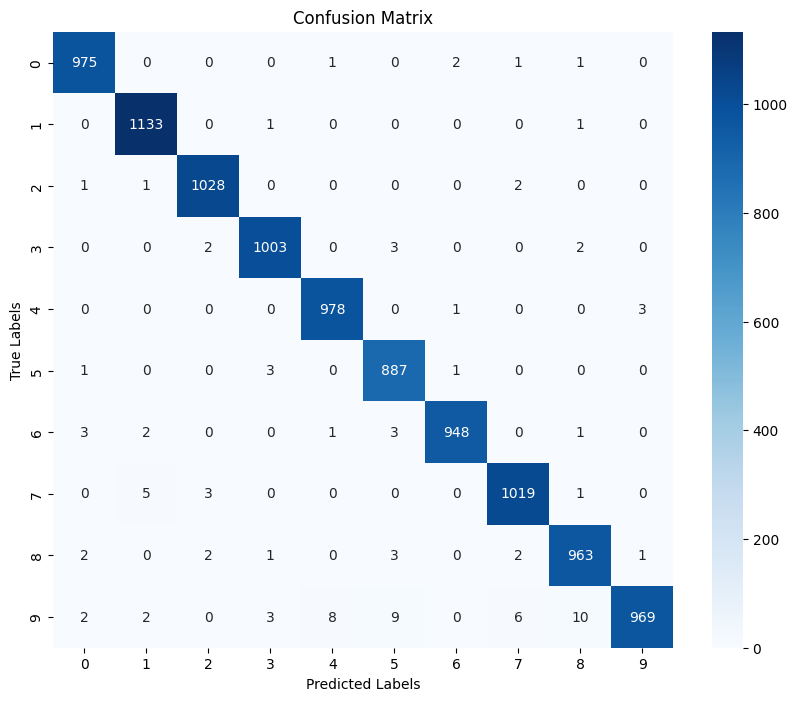

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.9949 - loss: 0.0162 - val_accuracy: 0.9925 - val_loss: 0.0325
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9972 - loss: 0.0096 - val_accuracy: 0.9930 - val_loss: 0.0315
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9973 - loss: 0.0089 - val_accuracy: 0.9931 - val_loss: 0.0319
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9974 - loss: 0.0073 - val_accuracy: 0.9929 - val_loss: 0.0322
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9982 - loss: 0.0064 - val_accuracy: 0.9930 - val_loss: 0.0330
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9973 - loss: 0.0072 - val_accuracy: 0.9935 - val_loss: 0.0309
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9983 - loss: 0.0049 - val_accuracy: 0.9930 - val_loss: 0.0328
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9982 - loss: 0.0062 - 

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Step 1: Load the MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Preprocess data by reshaping and normalizing
X_train_full = X_train_full.reshape(-1, 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255
y_train_full = to_categorical(y_train_full)
y_test = to_categorical(y_test)

# Step 2: Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Step 3: Visualize some samples from the dataset
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

# Step 4: Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Step 5: Compile the model with an appropriate loss function and optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Step 7: Plot training and validation loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()

# Step 8: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Step 9: Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Experiment with different learning rates, batch sizes, and neurons
# Example: Change learning rate, batch size, or hidden layers
# Try optimizer with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

# Preventing overfitting: Experiment with dropout or early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Retrain with early stopping
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=2, batch_size=32, callbacks=[early_stopping])

